In [49]:
import pandas as pd
import numpy as np
import seaborn as sns

In [50]:
df_mod = pd.read_csv('insurance_claims_with_probs(846).csv')
df_act= pd.read_csv('insurance_claims_with_probs(154).csv')

In [51]:
df_mod.info()
df_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           846 non-null    int64  
 1   age                          846 non-null    int64  
 2   policy_number                846 non-null    int64  
 3   policy_bind_date             846 non-null    object 
 4   policy_state                 846 non-null    object 
 5   policy_csl                   846 non-null    object 
 6   policy_deductable            846 non-null    int64  
 7   policy_annual_premium        846 non-null    float64
 8   umbrella_limit               846 non-null    int64  
 9   insured_zip                  846 non-null    int64  
 10  insured_sex                  846 non-null    object 
 11  insured_education_level      846 non-null    object 
 12  insured_occupation           846 non-null    object 
 13  insured_hobbies     

In [52]:
#hanya mengambil kolom total_claim_amount, fraud_reported, dan fraud_prob
df_mod = df_mod[['incident_date','total_claim_amount','fraud_prob']]
df_act = df_act[['incident_date','total_claim_amount','fraud_reported','fraud_prob']]

#converting fraud_reported into integers
df_act['fraud_reported'] = df_act['fraud_reported'].str.replace('Y', '1')
df_act['fraud_reported'] = df_act['fraud_reported'].str.replace('N', '0')
df_act['fraud_reported'] = df_act['fraud_reported'].astype(int)

## Kasus 1: Tanpa Re-asuransi

In [53]:
#A1 = total loss pada klaim non-fraud
#A2 = total loss pada klaim fraud
#A = total loss
A1_df = df_act[df_act['fraud_reported'] == 0]
A1= A1_df['total_claim_amount'].sum()

A2_df = df_act[df_act['fraud_reported'] == 1]
A2= A2_df['total_claim_amount'].sum()

A = df_act['total_claim_amount'].sum()

print("Total claim amount (non-fraud): %d" %(A1))
print("Total claim amount (fraud): %d" %(A2))
print("Total claim amount: %d" %(A))

A1+A2 == A

Total claim amount (non-fraud): 6084090
Total claim amount (fraud): 1520240
Total claim amount: 7604330


True

## Kasus 2 : Dengan Re-asuransi

In [54]:
df_act

,incident_date,total_claim_amount,fraud_reported,fraud_prob
0,2015-02-22,34650,0,0.128863
1,2015-02-27,51590,0,0.126125
2,2015-02-22,52110,0,0.570184
3,2015-02-22,60400,0,0.575736
4,2015-02-24,77880,0,0.131942
...,...,...,...,...
149,2015-02-26,3440,0,0.103483
150,2015-02-28,51390,0,0.595890
151,2015-02-22,87200,0,0.115844
152,2015-02-26,46980,0,0.556619


In [55]:
#B1 = total loss pada klaim non-fraud berdasarkan quota-share
#B2 = premi re-asuransi terhadap klaim fraud
#B = total loss 
B1 = (df_act['total_claim_amount'] * (1-df_act['fraud_prob'] )).sum()
print("Total claim amount (non-fraud): %f" %(B1))

Total claim amount (non-fraud): 5322648.307700


#### Premi Re-asuransi Fraud ( Quota-share )

In [56]:
df_mod

,incident_date,total_claim_amount,fraud_prob
0,2015-01-25,71610,0.539416
1,2015-01-21,5070,0.100314
2,2015-01-10,63400,0.603412
3,2015-02-17,6500,0.119884
4,2015-01-02,64100,0.567224
...,...,...,...
841,2015-01-23,36700,0.547371
842,2015-02-17,60200,0.124240
843,2015-01-22,6480,0.111893
844,2015-01-24,108480,0.590595


In [57]:
# convert the 'date' column to a datetime format
df_mod['incident_date'] = pd.to_datetime(df_mod['incident_date'])
df_act['incident_date'] = pd.to_datetime(df_act['incident_date'])
# sort the dataframe by date
df_mod = df_mod.sort_values('incident_date')


In [58]:
# #S1,..., Sn Expected Loss harian
# premium_df  = df_mod.groupby('incident_date')['total_claim_amount', 'fraud_prob'].apply(lambda x: (x['total_claim_amount'] * x['fraud_prob']).sum())
# premium_df = premium_df.rename('Sn').reset_index()

# B2 = premium_df['Sn'].sum() / premium_df['incident_date'].nunique() 
B2 = (df_mod['total_claim_amount'] * df_mod['fraud_prob']).sum() / df_mod['incident_date'].nunique()
print("Premium harian re-asuransi: %f" %(B2))
#B = total loss = B1 + B2 * berapa lama (hari) polis berjalan
B = B1 + B2 * df_act['incident_date'].nunique() 

Premium harian re-asuransi: 266841.564009


In [59]:
(df_mod['total_claim_amount'] * df_mod['fraud_prob']).sum()

13608919.764457047

In [60]:
print("Kasus 1: Tanpa Re-asuransi:")
print("Total claim amount (non-fraud): %d" %(A1))
print("Total claim amount (fraud): %d" %(A2))
print("Total loss Kasus 1: %d" %(A))

print("Kasus 2: Dengan Re-asuransi(Quota-share):")
print("Total claim amount (non-fraud): %f" %(B1))
print("Premium harian re-asuransi: %f" %(B2))
print("Total loss Kasus 2: %f" %(B))

Kasus 1: Tanpa Re-asuransi:
Total claim amount (non-fraud): 6084090
Total claim amount (fraud): 1520240
Total loss Kasus 1: 7604330
Kasus 2: Dengan Re-asuransi(Quota-share):
Total claim amount (non-fraud): 5322648.307700
Premium harian re-asuransi: 266841.564009
Total loss Kasus 2: 7724222.383781


### Kasus 3: Re-asuransi menggunakan Threshold

In [61]:
# Menerapkan threshold pada kolom fraud_prob
# set the threshold
threshold = np.arange(0.1,1.1,0.1)
Bt_array = []
B3_array = []
B4_array = []
for i in threshold:
    # create a new column 'fraud_pred' in the dataframe where values greater than or equal to the threshold are set to 1 and 0 otherwise
    df_mod['fraud_pred'] = df_mod['fraud_prob'].apply(lambda x: 1 if x >= i else 0)                                              
    df_act['fraud_pred'] = df_act['fraud_prob'].apply(lambda x: 1 if x >= i else 0)
    #B3 = total loss pada klaim non-fraud berdasarkan threshold
    #B4 = premi re-asuransi terhadap klaim fraud
    B3 = (df_act['total_claim_amount'] * (1-df_act['fraud_pred'] )).sum()
#     print("Total claim amount (non-fraud): %f" %(B3))
    #Premi Reasuransi threshold
    B4 = (df_mod['total_claim_amount'] * df_mod['fraud_pred']).sum() / df_mod['incident_date'].nunique()
#     print("Premium harian re-asuransi: %f" %(B4))
    #Bt = total loss = B3 + B4 * berapa lama (hari) polis berjalan
    B_temp = B3 + B4 * df_act['incident_date'].nunique()
    B3_array.append(B3)
    B4_array.append(B4)
    Bt_array.append(B_temp)
    
    

In [62]:
(df_mod['total_claim_amount'] * df_mod['fraud_pred']).sum()

0

In [63]:
Bt_columns = [threshold,Bt_array,B3_array,B4_array]
Bt = pd.DataFrame(Bt_columns).transpose()
Bt.columns = ['Threshold','Total Loss','Loss non-fraud','Loss fraud']

In [64]:
Bt

,Threshold,Total Loss,Loss non-fraud,Loss fraud
0,0.1,7.968990e+06,0.0,885443.333333
1,0.2,7.799173e+06,4622360.0,352979.215686
2,0.3,7.799173e+06,4622360.0,352979.215686
3,0.4,7.851353e+06,4733460.0,346432.549020
4,0.5,7.851353e+06,4733460.0,346432.549020
5,0.6,7.390236e+06,6764360.0,69541.764706
6,0.7,7.612082e+06,7425050.0,20781.372549
7,0.8,7.559632e+06,7547900.0,1303.529412
8,0.9,7.604330e+06,7604330.0,0.000000
9,1.0,7.604330e+06,7604330.0,0.000000


### Kasus 4: Re-asuransi Probabilitas Agregat

In [65]:
df_mod

,incident_date,total_claim_amount,fraud_prob,fraud_pred
40,2015-01-01,76600,0.108364,0
379,2015-01-01,79800,0.586540,0
34,2015-01-01,97080,0.778601,0
531,2015-01-01,88220,0.115844,0
84,2015-01-01,4320,0.130164,0
...,...,...,...,...
94,2015-02-20,72820,0.115844,0
603,2015-02-20,7150,0.104179,0
535,2015-02-20,54340,0.520389,0
406,2015-02-20,59070,0.104179,0


<AxesSubplot:xlabel='fraud_prob', ylabel='Count'>

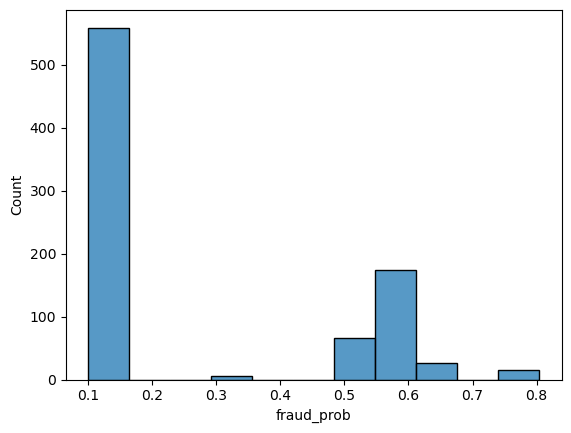

In [66]:
sns.histplot(data=df_mod['fraud_prob'])

<AxesSubplot:xlabel='fraud_prob', ylabel='Count'>

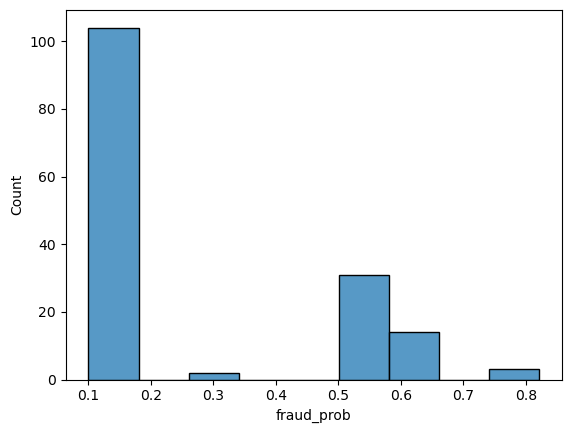

In [67]:
sns.histplot(data=df_act['fraud_prob'])

In [68]:
#menggunakan mean
prob = 0.4
df_mod_prob = df_mod[df_mod['fraud_prob'] > prob]
df_act_prob = df_act[df_act['fraud_prob'] > prob]
mean_prob_mod = df_mod_prob['fraud_prob'].mean()
mean_prob_act = df_act_prob['fraud_prob'].mean()
#total loss non fraud
B5 = (df_act['total_claim_amount'] * (1-mean_prob_act)).sum()
print("Total claim amount (non-fraud): %f" %(B5))
#total loss fraud
B6 = (df_mod['total_claim_amount'] * mean_prob_mod).sum() / df_mod['incident_date'].nunique()
print("Premium harian re-asuransi: %f" %(B6))
#B = total loss = B1 + B2 * berapa lama (hari) polis berjalan
B7 = B5 + B6 * df_act['incident_date'].nunique() 
print("Total loss Kasus 4 (mean) : %f" %(B7))

Total claim amount (non-fraud): 3118449.706251
Premium harian re-asuransi: 515647.847105
Total loss Kasus 4 (mean) : 7759280.330199


In [69]:
mean_prob_mod

0.5823612056167232

In [70]:
mean_prob_act

0.5899113128636649

In [71]:
#menggunakan median
med_prob_mod = df_mod_prob['fraud_prob'].median()
med_prob_act = df_act_prob['fraud_prob'].median()
#total loss non fraud
B8 = (df_act['total_claim_amount'] * (1-med_prob_act)).sum()
print("Total claim amount (non-fraud): %f" %(B8))
#total loss fraud
B9 = (df_mod['total_claim_amount'] * med_prob_mod).sum() / df_mod['incident_date'].nunique()
print("Premium harian re-asuransi: %f" %(B9))
#B = total loss = B1 + B2 * berapa lama (hari) polis berjalan
B10 = B8 + B9 * df_act['incident_date'].nunique() 
print("Total loss Kasus 4 (median) : %f" %(B10))

Total claim amount (non-fraud): 3221210.202527
Premium harian re-asuransi: 500299.922242
Total loss Kasus 4 (median) : 7723909.502707


In [72]:
#menggunakan modus
mod_prob_mod = df_mod_prob['fraud_prob'].mode()[0]
mod_prob_act = df_act_prob['fraud_prob'].mode()[0]
#total loss non fraud
B11 = (df_act['total_claim_amount'] * (1-mod_prob_act)).sum()
print("Total claim amount (non-fraud): %f" %(B11))
#total loss fraud
B12 = (df_mod['total_claim_amount'] * mod_prob_mod).sum() / df_mod['incident_date'].nunique()
print("Premium harian re-asuransi: %f" %(B12))
#B = total loss = B1 + B2 * berapa lama (hari) polis berjalan
B13 = B11 + B12 * df_act['incident_date'].nunique() 
print("Total loss Kasus 4 (modus) : %f" %(B13))

Total claim amount (non-fraud): 3422647.175101
Premium harian re-asuransi: 477622.650343
Total loss Kasus 4 (modus) : 7721251.028190
